In [3]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import mysql.connector 
DB=mysql.connector.connect(host="localhost",
                          username="ecomarce",
                          password="123", 
                          database="ecomarce")
cur=DB.cursor()

#  List all unique cities where customers are located.

In [3]:
query=""" select distinct customer_city from customers  """
cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data )
df

,0
0,franca
1,sao bernardo do campo
2,sao paulo
3,mogi das cruzes
4,campinas
...,...
4114,siriji
4115,natividade da serra
4116,monte bonito
4117,sao rafael


In [8]:
query=""" select count(distinct customer_city ) from customers  """
cur.execute(query)
data=cur.fetchall()
data

[(4119,)]

# Count the number of orders placed in 2017.

In [10]:
query=""" select count(order_id) from orders where year(order_purchase_timestamp)=2017 """
cur.execute(query)
data=cur.fetchall()
data[0][0]

90202

#  Find the total sales per category.

In [1]:
query=""" select products.product_category category, round(sum(payments.payment_value), 2)
from products join order_items on products.product_id  = order_items.product_id join payments on payments.order_id =order_items.order_id group by category

"""
cur.execute(query)
data=cur.fetchall()
data[0][0]

NameError: name 'cur' is not defined

# Calculate the percentage of orders that were paid in installments.

In [12]:
query=""" select (sum(case when payment_installments >=1  then 1
else 0 end) )/count(*)*100 from payments 

"""
cur.execute(query)
data=cur.fetchall()

print("the percentage of orders that were paid in installments", data[0][0])

the percentage of orders that were paid in installments 99.9981


# 5. Count the number of customers from each state.

In [34]:
query="""  
SELECT customer_state, count(customer_id ) FROM customers GROUP BY customer_state
"""
cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data , columns=['state' , 'country_count'])
df=df.sort_values(by="country_count" , ascending=False)
df





,state,country_count
25,SP,83492
18,RJ,25704
10,MG,23270
22,RS,10932
17,PR,10090
23,SC,7274
4,BA,6760
6,DF,4280
7,ES,4066
8,GO,4040


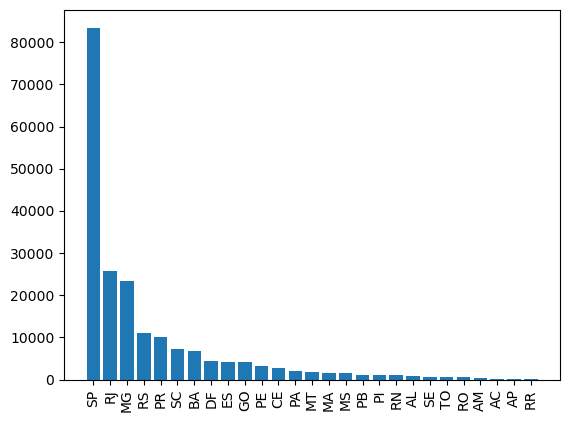

In [36]:
plt.bar(df['state'], df['country_count'])

plt.xticks(rotation = 90)
plt.show()

# Intermadiate part in thisd code 

#  Calculate the number of orders per month in 2018.

C:\Users\Rezaul\AppData\Local\Temp\ipykernel_1100\2294798405.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(x=df['months'] ,y= df['count_of_order']  , order=o  , palette="viridis")


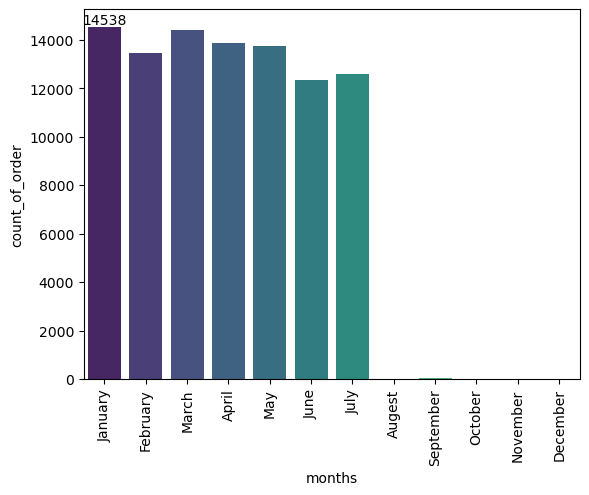

In [39]:
query="""  
SELECT monthname(order_purchase_timestamp) months  , count(order_id) from orders where year(order_purchase_timestamp)=2018
group by months

;
"""
cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data , columns=["months" , "count_of_order"])
o=["January" ,'February', 'March',"April", "May", 'June','July' , "Augest" ,"September" ,"October" , "November", "December" ]
ax=sns.barplot(x=df['months'] ,y= df['count_of_order']  , order=o  , palette="viridis")
ax.bar_label(ax.containers[0])
plt.xticks(rotation=90)
plt.show()

# Find the average number of products per order, grouped by customer city.

In [ ]:
query=""" 
WITH count_per_order AS (
    SELECT 
        orders.order_id, 
        orders.customer_id, 
        COUNT(order_items.order_id) AS order_count -- Adding alias here
    FROM 
        orders 
    JOIN 
        order_items ON orders.order_id = order_items.order_id
    GROUP BY 
        orders.order_id, 
        orders.customer_id  
)
SELECT 
    customers.customer_city, 
    AVG(count_per_order.order_count) -- Updated alias to match
FROM  
    customers 
JOIN 
    count_per_order ON customers.customer_id = count_per_order.customer_id 
GROUP BY 
    customers.customer_city;

"""
cur.execute(query)
data=cur.fetchall()
data

# Advance Query

# Calculate the moving average of order values for each customer over their order history

In [1]:
query=""""""SELECT orders.order_id, orders.order_purchase_timestamp , payments.payment_value
FROM payments JOIN orders
on payments.order_id = orders.order_id"""
cur.execute(query)
data=cur.fetchall()
data


SyntaxError: unterminated triple-quoted string literal (detected at line 6) (4244428038.py, line 3)